# Clustering

## K-Means Algorithm

This is my IPython notebook to practice, learn and demonstrate concepts in Clustering using the K-Means algorithm. This notebook will use scikit-learn, for implementation in other languages refer to the actual repo.

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from pprint import pprint
np.random.seed(sum(map(ord, "aesthetics")))
seaborn.set_context('notebook')

(300, 2) (300,)


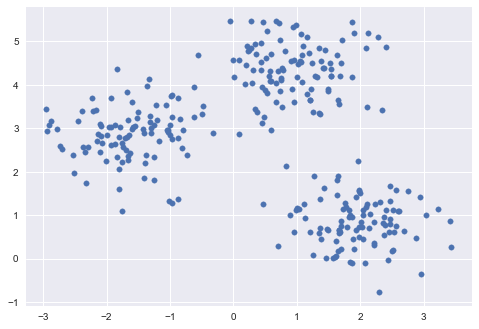

In [2]:
#Generating some random samples (blobs) - basically generates random samples X, y with 3 clusters (centers parameter)
#also making it fairly easy to spot the clusters, note the cluster_std parameter
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.60)
print (X.shape, y.shape) #y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being

# Visualizing the blobs as a scatter plot
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired);

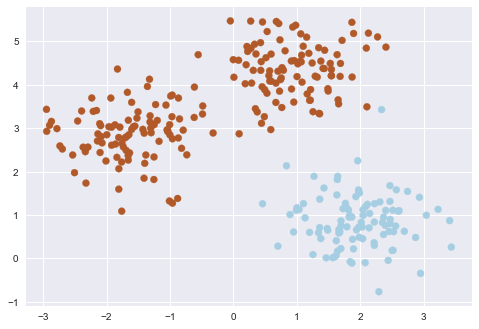

In [6]:
#The clusters are fairly easy to identify just by looking at it. But we'll now try to identify this using
#the K-Means algorithm.

from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=2) #number of clusters to predict 3
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#That's pretty impressive, it identifies the clusters neatly

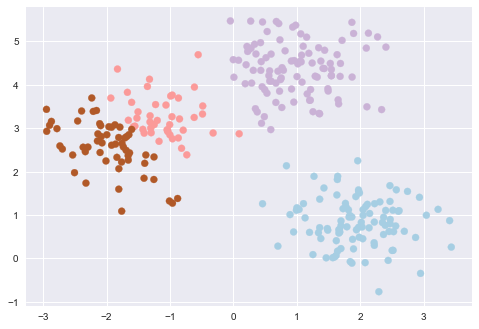

In [7]:
#Let's try changing around some parameters

#If we insist of finding 4 instead of 3 clusters

ktest = KMeans(n_clusters=4) #number of clusters to predict 4
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#K-Means tries its best to find separation

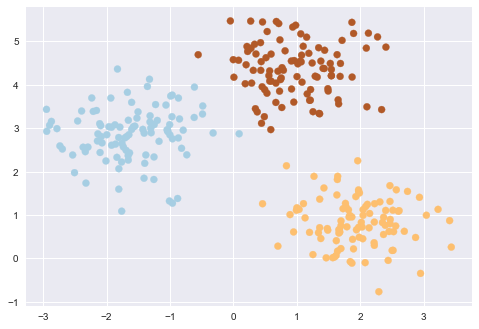

In [11]:
#Let's try changing around some parameters

#Setting max iterations to 100 instead of the default 300

ktest = KMeans(n_clusters=3, max_iter=1) #number of clusters to predict 4
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#Result doesn't look much different

(300, 2) (300,)


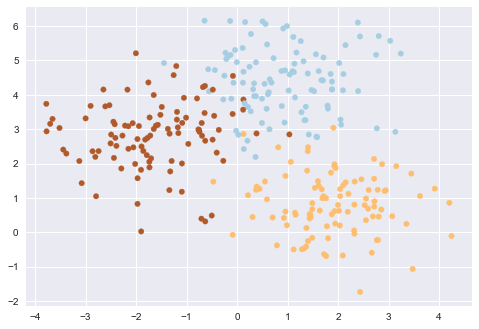

In [18]:
#Let's try to make it harder to find the clusters using the cluster_std parameter

X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.95)
print (X.shape, y.shape) #y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being

# Visualizing the blobs as a scatter plot
plt.scatter(X[:, 0], X[:, 1],c=y, s=30, cmap=plt.cm.Paired)
plt.show()

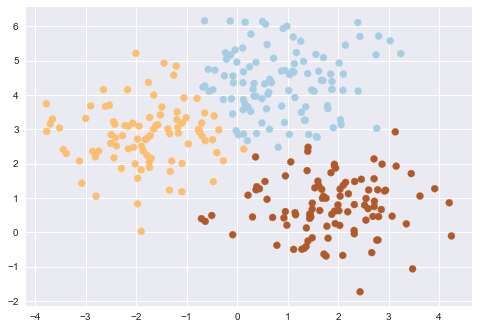

In [14]:
#Now again running K-Means with just 100 iterations

ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 4
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#It's actually done a pretty good job of seperating the data

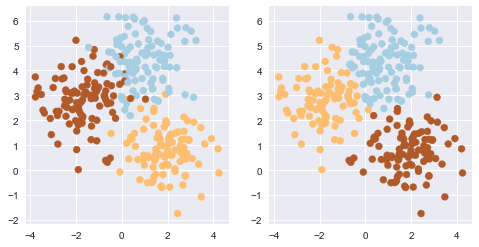

In [19]:
#Let's quickly compare cluster labels and original labels (y) using scatter plots
fig, ax=plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.Paired)
ax[1].scatter(X[:,0], X[:,1],c=y_pred, cmap=plt.cm.Paired)
plt.show()

#Looks very close, K-Means has done a great job finding the clusters.

**Example 1** Digits data available in scikit-learn

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.keys())

#As the keys indicate, Digits dataset has images of digits stored under data and the actual digit stored under target
#There are 1797 images in total
print (digits.data.shape)
print (digits.target)

#the images are 8x8 pixels each stored as 64 dimensions to make it understandable for the ML algorithms.
print (digits.images.shape)

dict_keys(['images', 'DESCR', 'target', 'target_names', 'data'])
(1797, 64)
[0 1 2 ..., 8 9 8]
(1797, 8, 8)


In [23]:
#Let's ignore targets for the time being and use K-Means to find clusters in these images. We know that there are a total
#10 clusters for 0-9 digits
X,y=digits.data, digits.target
k_digits = KMeans(n_clusters=10)
y_pred=k_digits.fit_predict(X)
#Let's check the parameter cluster centers of the estimator
print (k_digits.cluster_centers_.shape)
k_digits.cluster_centers_

(10, 64)


array([[  0.00000000e+00,   5.95505618e-01,   8.69662921e+00,
          1.45730337e+01,   1.40280899e+01,   7.01123596e+00,
          5.67415730e-01,  -2.77555756e-16,   1.12359551e-02,
          4.17977528e+00,   1.26067416e+01,   9.10674157e+00,
          1.12134831e+01,   1.19943820e+01,   1.86516854e+00,
          1.12359551e-02,   5.61797753e-03,   1.88202247e+00,
          3.65730337e+00,   3.56741573e+00,   1.17528090e+01,
          9.88764045e+00,   8.48314607e-01,   6.24500451e-17,
         -2.81892565e-18,   5.61797753e-02,   9.49438202e-01,
          8.25842697e+00,   1.38426966e+01,   6.74719101e+00,
          3.03370787e-01,  -5.63785130e-18,   0.00000000e+00,
          6.17977528e-02,   6.74157303e-01,   4.60674157e+00,
          1.17584270e+01,   1.22359551e+01,   2.30337079e+00,
          0.00000000e+00,  -2.25514052e-17,   4.49438202e-01,
          1.43820225e+00,   6.91011236e-01,   4.19101124e+00,
          1.23820225e+01,   6.30337079e+00,   5.61797753e-03,
        

In [36]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

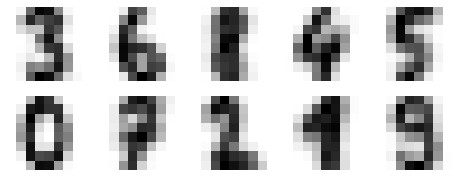

In [37]:
#The shape tells us these are centroids, that is the center of each of the clusters. In essence, 8x8 images of each of the 
#10 digits (atleast we expect it to be). Let's find out by visualizing these using scatter.

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(k_digits.cluster_centers_[i],(8,8)), cmap=plt.cm.binary)

#That is pretty great. It actually was able to find the clusters of the 10 digits nicely.
#Number 8 doesn't look very clear but everything else looks very good.

/Users/karanrajwanshi/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


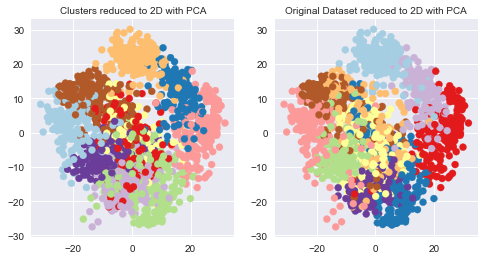

In [38]:
#Let's visualize predicted labels and original labels to see if they're close.

#Now, X is a 64 dimension dataset. If we need to visualize this in 2D, we'll need to use PCA to reduce
#the dimensionality. Refer to << >> for a demonstration of PCA.

from sklearn.decomposition import RandomizedPCA
pca=RandomizedPCA(2).fit(X)
X_proj = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(X_proj[:,0], X_proj[:,1], c=y_pred, cmap=plt.cm.Paired)
ax[0].set_title('Clusters reduced to 2D with PCA', fontsize=10)

ax[1].scatter(X_proj[:,0], X_proj[:,1], c=y, cmap=plt.cm.Paired)
ax[1].set_title('Original Dataset reduced to 2D with PCA', fontsize=10)

plt.show()

#This looks pretty reasonable considering we never used the original labels to learn (like so with Supervised learning)
#the clusters were automatically identified and they reasonably resemble the targets.